# Starting Jupyter
- To run Jupyter in Kubernetes, run `deploy.sh`.
- To run Jupyter directly in Docker, run `start_jupyter_docker.sh`.

# Install dependencies

In [ ]:
!conda install -y opencv

In [ ]:
!pip install grpcio

In [ ]:
!pip uninstall -y pravega-grpc-gateway-client ; \
    rm -rf /tmp/pravega-grpc-gateway ; \
    git clone https://github.com/pravega/pravega-grpc-gateway /tmp/pravega-grpc-gateway && \
    cd /tmp/pravega-grpc-gateway && \
    git checkout master && \
    pip install pravega-grpc-gateway/src/main/python

# Import dependencies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import IPython
import cv2
import itertools
import numpy as np
import pandas as pd
import grpc
import json
import base64
import datetime
import time
import imp

In [3]:
import pravega.grpc_gateway as pravega
import pravega.video as video
from pravega.video import UnindexedStream

In [4]:
imp.reload(video);

In [5]:
pd.set_option('display.max_colwidth', -1)

# Define Pravega stream parameters

In [6]:
#gateway = 'pravega-grpc-gateway:80'
# gateway = '10.243.37.107:80'
gateway = 'hop-claudio-ubuntu18-desktop.solarch.lab.emc.com:54672'
scope = 'examples'
stream = 'video1'

# Initialize connection to Pravega GRPC Gateway

In [7]:
pravega_channel = grpc.insecure_channel(gateway)
pravega_client = pravega.grpc.PravegaGatewayStub(pravega_channel)
unindexed_stream = UnindexedStream(pravega_client, scope, stream)

# Get head and tail stream cuts

In [8]:
stream_info = unindexed_stream.get_stream_info()
stream_info

head_stream_cut {
  text: "H4sIAAAAAAAAADOwSq1IzC3ISS3WL8tMSc03tDIAQQC1+rvPFwAAAA=="
  cut {
    key: 0
    value: 0
  }
}
tail_stream_cut {
  text: "H4sIAAAAAAAAADOwSq1IzC3ISS3WL8tMSc03tDIAQkNjY0tTYwNLAwsAaPG5GCAAAAA="
  cut {
    key: 0
    value: 1339530908
  }
}

In [9]:
stream_size_MB = (stream_info.tail_stream_cut.cut[0] - stream_info.head_stream_cut.cut[0]) * 1e-6
stream_size_MB

1339.530908

# Play video stream from the earliest time and stop at current time

In [ ]:
from_stream_cut = stream_info.head_stream_cut
to_stream_cut = stream_info.tail_stream_cut

In [ ]:
unindexed_stream.play_video(from_stream_cut, to_stream_cut)

# Play video stream from the current time (do not stop)

In [10]:
from_stream_cut = stream_info.tail_stream_cut
to_stream_cut = None

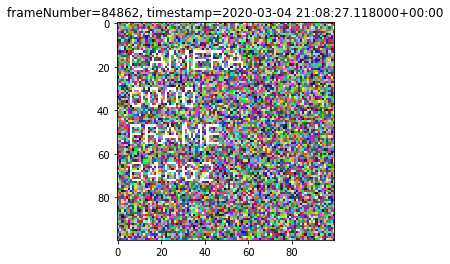

KeyboardInterrupt: 

In [11]:
unindexed_stream.play_video(from_stream_cut, to_stream_cut)